# Dimensions Data Analysis
This notebook is a part of the LEADING 2023 project at the University or Rochester. It is used to analyze the Dimensions data about dataset depositing behaviors and patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

## Note!
Read-in the sample data for github recreation. The sample data only uses 10% of the original data to save space in the repository.

In [ ]:
df = pd.read_csv("data/dimensions_sample.csv")

### Set up the working directory and read the data
#### This is if you are using data from the google drive

The directory can be local path or Google Drive path.
Use the dimensions_combined.csv file shared by Laura

In [ ]:
# os.chdir(r'C:\OneDrive - University of Oklahoma\Courses\LEADING Bootcamp\LEADING 2023')
# df = pd.read_csv("Dimensions Data/dimensions_combined.csv")
# df = pd.read_csv("Dimensions Data/dimensions_combined.csv")

In [4]:
# df = pd.read_csv("data/dimensions.csv")
# df.shape

(13652, 22)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/dimensions_combined.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset structure, including columns and missing values

In [ ]:
df.columns

Index(['Unnamed: 0', 'Rank', 'Data ID', 'DOI', 'Title', 'Description',
       'Repository', 'Publication date', 'Publication year', 'Dataset author',
       'Associated publication', 'Dimensions URL', 'Source linkout',
       'Fields of Research (ANZSRC 2020)', 'RCDC Categories',
       'HRCS HC Categories', 'HRCS RAC Categories', 'Health Research Areas',
       'Broad Research Areas', 'Cancer Types', 'CSO Categories',
       'Sustainable Development Goals'],
      dtype='object')

In [ ]:
df.isna().any()

Unnamed: 0                          False
Rank                                False
Data ID                             False
DOI                                 False
Title                               False
Description                          True
Repository                          False
Publication date                    False
Publication year                    False
Dataset author                       True
Associated publication              False
Dimensions URL                      False
Source linkout                      False
Fields of Research (ANZSRC 2020)     True
RCDC Categories                      True
HRCS HC Categories                   True
HRCS RAC Categories                  True
Health Research Areas                True
Broad Research Areas                 True
Cancer Types                         True
CSO Categories                       True
Sustainable Development Goals        True
dtype: bool

### Divide the dataset by the existence of Dataset author
There are 3515 datasets with authors, which is about 26% of the whole dataset.

In [ ]:
df_w_author = df.loc[~df['Dataset author'].isna()].copy()
df_no_author = df.loc[df['Dataset author'].isna()].copy()
print(len(df))
print(len(df_w_author))
print(len(df_w_author)/len(df))

13652
3515
0.2574714327571052


About 85% of the datasets have 'Fields of Research (ANZSRC 2020)'.

In [ ]:
df_w_field= df.loc[~df['Fields of Research (ANZSRC 2020)'].isna()].copy()
print(len(df_w_field))
print(len(df_w_field)/len(df))

11565
0.8471286258423674


This function is used to visualize the count of each category in a column.

In [ ]:
def vis_cat(df, cat, threshold=0.01):
    cat_counts = df[cat].value_counts()
    cat_counts = cat_counts.sort_values(ascending=False)
    print(cat_counts)
    # Calculate the percentage of each Repository
    percentages = cat_counts / cat_counts.sum()

    # Merge categories with a percentage lower than 1% into 'Other'
    percentages['Other'] = percentages[percentages < threshold].sum()
    percentages = percentages[(percentages >= threshold) | (percentages.index=='Other')]

    # Create the pie chart
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')

    # Set the title
    plt.title('Percentage of Categories')

    # Display the chart
    plt.show()

### Visualization of the categories by Repository in the whole dataset or groups with or without authors
The datasets without authors are more likely to be deposited in HEPData, which is a repository for high energy physics.

HEPData                                             10142
The Cambridge Structural Database                    1851
Public Library of Science                             686
American Chemical Society                             527
Springer Nature                                        96
Strasbourg Astronomical Data Center                    84
Frontiers                                              77
ICPSR                                                  51
Mendeley Data                                          21
Taylor & Francis Group                                 20
American Association for Cancer Research               16
DRYAD                                                  13
PANGAEA                                                11
SAGE Journals                                           9
NIAID                                                   7
Zenodo                                                  6
Karger Publishers                                       5
GSA Journals  

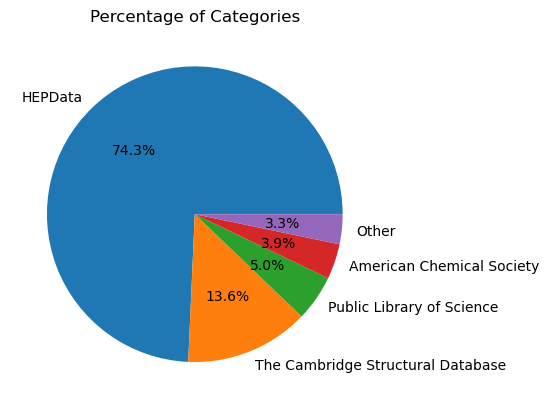

The Cambridge Structural Database               1851
Public Library of Science                        686
American Chemical Society                        527
Springer Nature                                   96
Strasbourg Astronomical Data Center               84
Frontiers                                         77
ICPSR                                             51
Mendeley Data                                     21
Taylor & Francis Group                            20
American Association for Cancer Research          16
DRYAD                                             13
PANGAEA                                           11
SAGE Journals                                      9
HEPData                                            7
NIAID                                              7
Zenodo                                             6
Karger Publishers                                  5
GSA Journals                                       5
SciELO journals                               

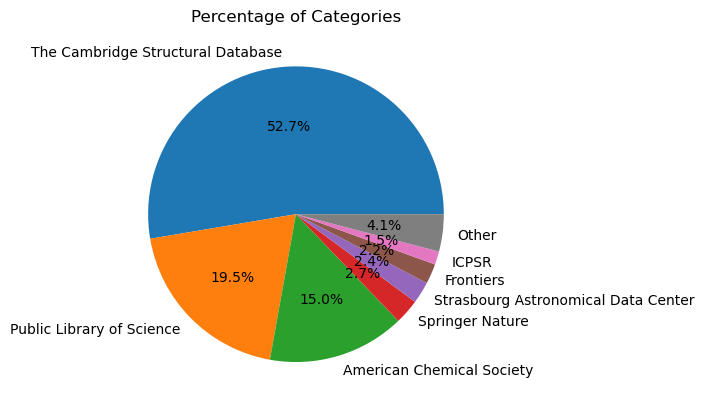

HEPData                                             10135
Environmental Protection Agency (EPA) Repository        1
IceCube Neutrino Observatory                            1
Name: Repository, dtype: int64


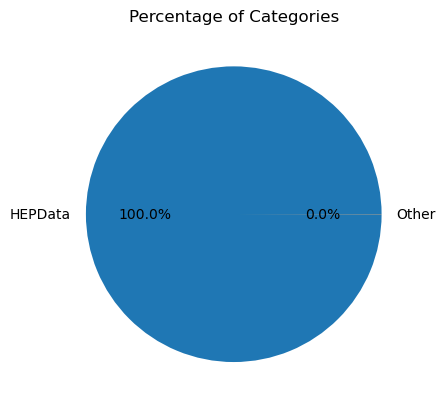

In [ ]:
vis_cat(df,'Repository')
vis_cat(df_w_author,'Repository')
vis_cat(df_no_author,'Repository')

This function is used to visualize the publication numbers by year.

In [ ]:
def vis_year(df):
    year_counts = df['Publication year'].value_counts().sort_index()

    # Create the figure and axes
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Publication Year')
    ax1.set_ylabel('Count', color='b')
    ax1.set_title('Publication Year Counts')

    # Create the line chart
    ax1.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=45)

    # Display the chart
    plt.show()

### Publication number by year in the whole dataset or groups with or without authors

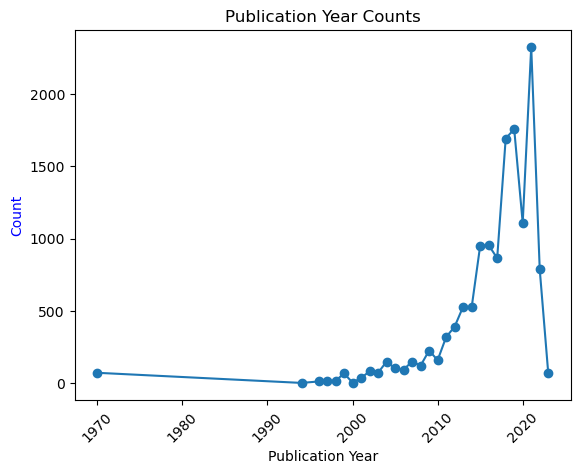

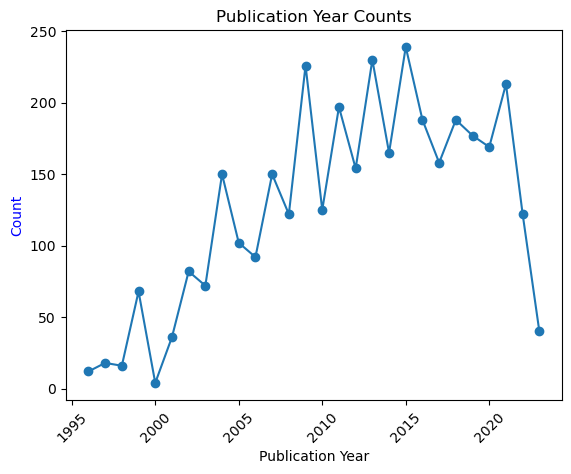

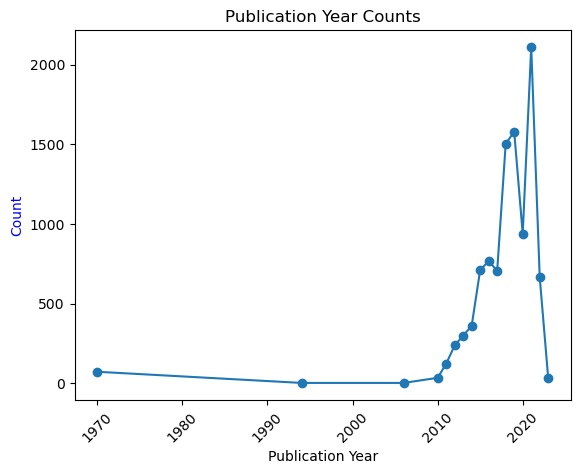

In [ ]:
vis_year(df)
vis_year(df_w_author)
vis_year(df_no_author)

This function is used to unstack authors or research fields (as there are multiple values in one cell) and visualize the counts.

In [ ]:
def vis_cat_stack(df, cat, threshod=0.02):
    # Calculate the percentage of each Repository
    field_counts = df[cat].str.split('; ', expand=True).stack().value_counts()
    print(field_counts)
    field_percentages = field_counts / field_counts.sum()

    # Merge categories with a percentage lower than 1% into 'Other'
    field_percentages['Other'] = field_percentages[field_percentages < threshod].sum()
    field_percentages = field_percentages[(field_percentages >= threshod) | (field_percentages.index=='Other')]

    # Create the pie chart
    plt.pie(field_percentages, labels=field_percentages.index, autopct='%1.1f%%')

    # Set the title
    plt.title('Percentage of Categories')

    # Display the chart
    plt.show()

### Count of Fields of Research (ANZSRC 2020) in the whole dataset or groups with or without authors
The research fields can overlap. The top fields in the datasets with authors are related to Chemical and Biological sciences.

51 Physical Sciences                       20039
5107 Particle and High Energy Physics       9658
5106 Nuclear and Plasma Physics             8538
49 Mathematical Sciences                    3964
34 Chemical Sciences                        1023
                                           ...  
4010 Engineering Practice and Education        1
3604 Performing Arts                           1
3708 Oceanography                              1
4401 Anthropology                              1
4204 Midwifery                                 1
Length: 141, dtype: int64


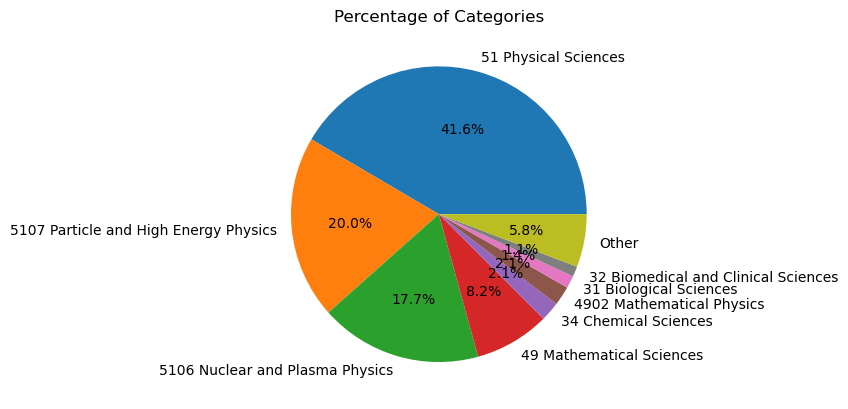

34 Chemical Sciences                       1015
31 Biological Sciences                      658
32 Biomedical and Clinical Sciences         541
3402 Inorganic Chemistry                    391
3405 Organic Chemistry                      172
                                           ... 
4204 Midwifery                                1
4010 Engineering Practice and Education       1
3708 Oceanography                             1
4014 Manufacturing Engineering                1
4402 Criminology                              1
Length: 139, dtype: int64


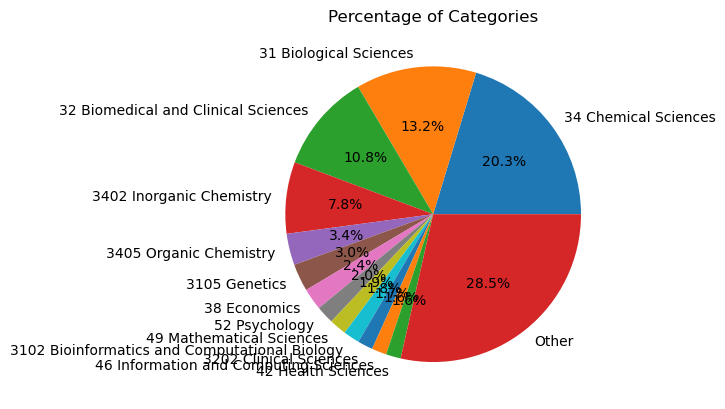

51 Physical Sciences                          19984
5107 Particle and High Energy Physics          9653
5106 Nuclear and Plasma Physics                8528
49 Mathematical Sciences                       3870
4902 Mathematical Physics                      1018
5110 Synchrotrons and Accelerators              100
5102 Atomic, Molecular and Optical Physics       19
4901 Applied Mathematics                         13
3904 Specialist Studies In Education              8
39 Education                                      8
34 Chemical Sciences                              8
4904 Pure Mathematics                             6
3406 Physical Chemistry                           4
46 Information and Computing Sciences             3
37 Earth Sciences                                 2
3701 Atmospheric Sciences                         1
40 Engineering                                    1
4014 Manufacturing Engineering                    1
dtype: int64


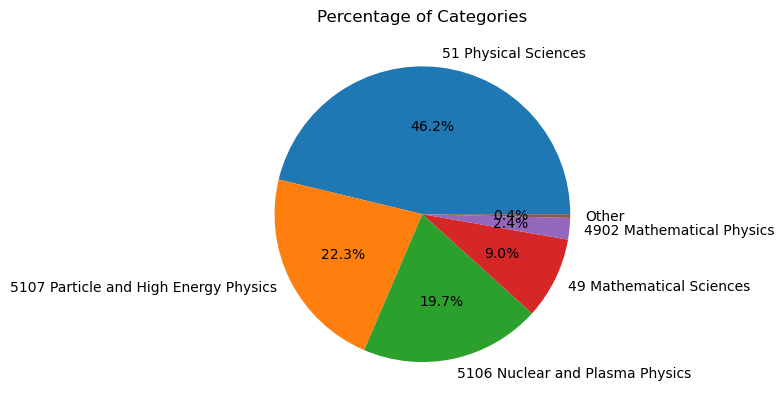

In [ ]:
vis_cat_stack(df,'Fields of Research (ANZSRC 2020)', 0.01)
vis_cat_stack(df_w_author,'Fields of Research (ANZSRC 2020)', 0.015)
vis_cat_stack(df_no_author,'Fields of Research (ANZSRC 2020)', 0.01)

This function is used to reformat the author names. As there are different formats, including "First Name Last Name", "Last Name, First Name", "Initial Last Name", etc. this function primitively changes all names to "Initial Last Name" format.

In [ ]:
# Assuming df is your DataFrame containing the 'Dataset author' column

# Step 1: Parse the author names and split them into first name and last name
authors_split = df_w_author['Dataset author'].str.split('; ', expand=True).stack()

# Step 2: Rearrange the names to "first name last name" format
# Function to extract first and last names based on the presence of a comma
def rearrange_name(row):
    if ',' in row and row[-1]!=',':
        last_name = row.split(',')[0].strip()
        first_name = row.split(',')[1].strip()
        first_name = first_name[0]

    else:
        name_parts = row.split()
        last_name = name_parts[-1]
        first_name = row[0]
    return first_name + " " + last_name

# Apply the function
authors_rearranged = authors_split.transform(lambda x: rearrange_name(x))

# Step 3: Count the occurrences of each name
author_counts = authors_rearranged.value_counts()

# print(author_counts)


There are 5069 unique authors in the dataset with authors.

In [ ]:
len(author_counts)

5069

In [ ]:
print(author_counts[:100])

W Brennessel    1201
W Jones          793
P Holland        499
R Lachicotte     378
R Eisenberg      261
                ... 
H Chao            25
S Murali          25
D Hughes          25
H Dinh            25
M Grochowski      25
Name: count, Length: 100, dtype: int64


In [ ]:
author_counts.to_csv('author_counts.csv')

### Read the faculty list file

In [ ]:
df_faculty = pd.read_csv("FacultyData2021_MasterFile_20230630.xlsx - 2021_08_Senate_Voting_Faculty.csv")

In [ ]:
# df_faculty = pd.read_csv("/content/drive/MyDrive/FacultyData2021_MasterFile_20230630.xlsx - 2021_08_Senate_Voting_Faculty.csv")

Change the faculty names to "Initial Last Name" format.

In [ ]:
df_faculty['alias'] = df_faculty['First'].str[0]+' '+df_faculty['Last']

In [ ]:
df_faculty.head()

,Division_Name,HRMS_Department,Job_Description,Formatted_Job_Description,EMPLID,Full_Name,Last,First,middle,Sex,...,Job_Code,Work_Address,Email,NETID,Dimension ID,Scopus ID,Web of Science,ORCID,Number of Identifiers,alias
0,School of Medicine & Dentistry,Department of Dentistry M&D,"Assoc Prof: TE, T, R, S",Assoc Prof,261422,"Khan,Junad",Khan,Junad,NaN,M,...,3,NaN,Junad_Khan@URMC.Rochester.edu,jkhan4,ur.0756602625.73,'25521898700',"Y-9759-2019,DUK-1362-2022",0000-0002-3107-6118,4,J Khan
1,School of Medicine & Dentistry,Ophthalmology M&D,"Asst Prof: TE, T, R, S",Asst Prof,239590,"Wozniak,Rachel A",Wozniak,Rachel,A,F,...,5,NaN,rachel_wozniak@urmc.rochester.edu,rwozniak,ur.0701040565.29,'24081844900',"Y-9717-2019,,DYF-9795-2022",0000-0002-2693-1394,4,R Wozniak
2,Sch Engineering & App Sci,Computer Science,"Professor: TE, T, R, S",Professor,156563,"Hemaspaandra,Lane A",Hemaspaandra,Lane,A,M,...,1,NaN,lane.hemaspaandra@rochester.edu,lhemaspa,ur.01222705074.47,'7004106538',"W-7512-2018,FZN-5379-2022",0000-0003-0659-5204,4,L Hemaspaandra
3,Sch Engineering & App Sci,The Institute of Optics,Expert Researcher: R,Expert Researcher,262031,"E,Yiwen",E,Yiwen,NaN,F,...,65,NaN,ye2@UR.Rochester.edu,ye2,ur.01027224527.36,'55320576800',"W-4480-2019,CNF-9457-2022",0000-0002-9677-243X,4,Y E
4,The College,Psychology,"Professor: TE, T, R, S",Professor,165174,"Davies,Patrick",Davies,Patrick,NaN,M,...,1,NaN,patrick.davies@rochester.edu,pdavies,ur.01313527437.06,'35578227300',W-2776-2018,0000-0003-2725-9736,4,P Davies


In [ ]:
author_counts_df = author_counts.reset_index()
author_counts_df.columns = ['alias', 'Count']

# Merge the unique_authors_df with author_counts_df based on 'Author Name'
merged_df = pd.merge(df_faculty, author_counts_df, on='alias', how='left')

# If there are authors with no counts (not found in the original DataFrame), fill them with 0
# merged_df['Count'].fillna(0, inplace=True)

# Display the merged DataFrame with author counts
# print(merged_df)

Merge the faculty list with the dataset list by the author names.
There are 2765 faculties, but only 416 of them have deposited datasets.

In [ ]:
df_faculty_count = merged_df.loc[~merged_df['Count'].isna()]

In [ ]:
print(len(merged_df))
print(len(df_faculty_count))
print(len(df_faculty_count)/len(merged_df))

2765
416
0.15045207956600362


In [ ]:
df_faculty_count[['alias','Count']].sort_values(by='Count', ascending=False)

,alias,Count
137,W Brennessel,1201.0
702,W Jones,793.0
325,J Smith,210.0
519,M Neidig,210.0
134,A Frontier,120.0
...,...,...
878,D Dean,1.0
896,H Wang,1.0
898,D Yule,1.0
901,W Zareba,1.0


### Visualization of the categories by Division_Name and HRMS_Department, comparing the distributions of the faculty with datasets and all faculties.

The distributions of Division (school) of the faculties with datasets are similar to all faculties.

School of Medicine & Dentistry    1896
The College                        381
Sch Engineering & App Sci          114
Eastman School Music               108
School of Nursing                   79
Laser Lab & COI                     76
Simon Grad School Business          66
Warner Grad School Education        38
Health Sciences                      3
Central Admin-Provost Office         2
Central Admin-Pres Office            1
Central Admin-Sr VP & CFO            1
Name: Division_Name, dtype: int64


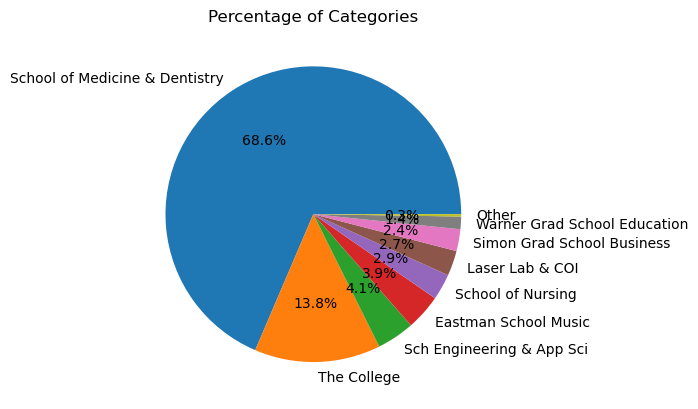

School of Medicine & Dentistry    287
The College                        77
Sch Engineering & App Sci          27
School of Nursing                   8
Simon Grad School Business          8
Laser Lab & COI                     5
Eastman School Music                4
Name: Division_Name, dtype: int64


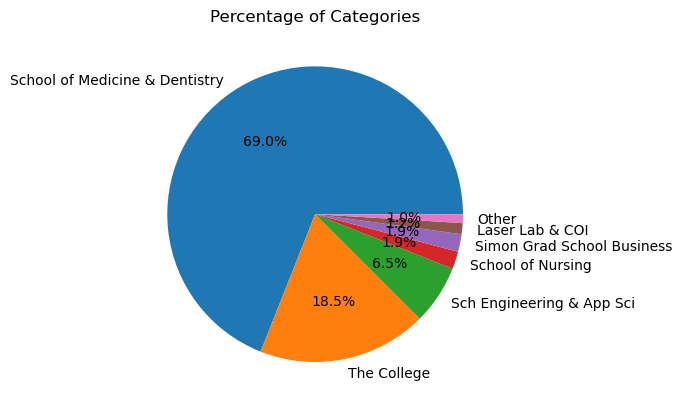

In [ ]:
vis_cat(df_faculty, 'Division_Name')
vis_cat(df_faculty_count, 'Division_Name')

#### Compare the distribution of school/department between the faculties with and without datasets.
Similar distributions between the faculties with and without datasets.

In [ ]:
df_faculty_no_count = merged_df.loc[merged_df['Count'].isna()]

School of Medicine & Dentistry    287
The College                        77
Sch Engineering & App Sci          27
School of Nursing                   8
Simon Grad School Business          8
Laser Lab & COI                     5
Eastman School Music                4
Name: Division_Name, dtype: int64


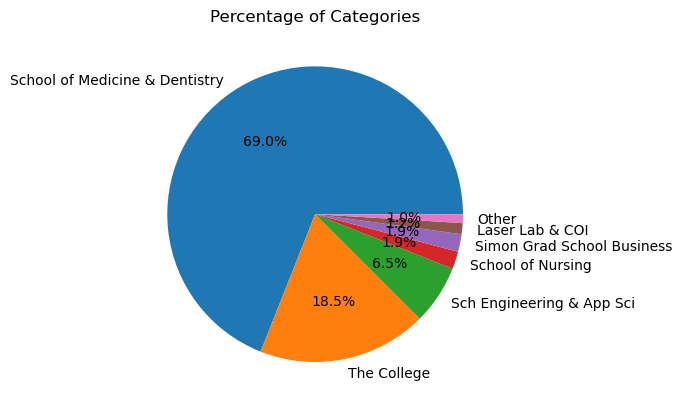

School of Medicine & Dentistry    1609
The College                        304
Eastman School Music               104
Sch Engineering & App Sci           87
School of Nursing                   71
Laser Lab & COI                     71
Simon Grad School Business          58
Warner Grad School Education        38
Health Sciences                      3
Central Admin-Provost Office         2
Central Admin-Pres Office            1
Central Admin-Sr VP & CFO            1
Name: Division_Name, dtype: int64


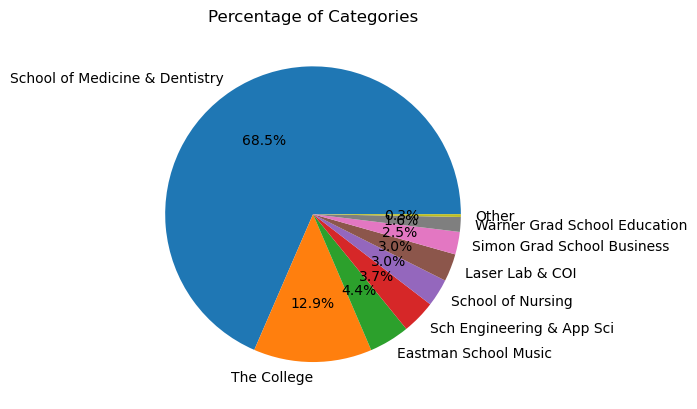

In [ ]:
vis_cat(df_faculty_count, 'Division_Name')
vis_cat(df_faculty_no_count, 'Division_Name')

### Visualization of the categories by HRMS_Department
There are differences in the distributions of HRMS_Department between groups of the faculties with and without datasets, where the faculties with datasets are not in the highest percentage of the departments.

Anesthesiology & Periop Med       95
Imaging Sciences-Faculty          91
Medicine/Primary Care Phy         85
LLE-Laboratory for Laser Energ    76
Department of Family Medicine     71
                                  ..
ESM Office of the Dean             1
Pediatrics M&D Genetics            1
ESM Organ                          1
Psychiatry M&D Long Term Care      1
SON Central Administration         1
Name: HRMS_Department, Length: 185, dtype: int64


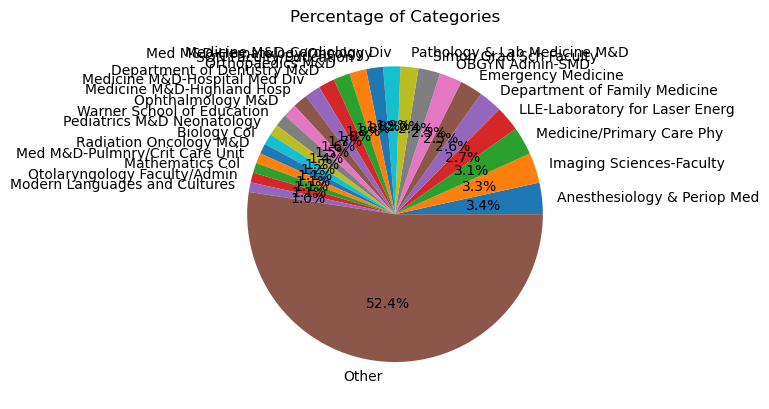

Biology Col                       21
Biostats Computational Biology    14
Pathology & Lab Medicine M&D      13
Biochemistry and Biophysics       11
Ophthalmology M&D                 11
                                  ..
Cardiac Surgery M&D                1
Art & Art History Col              1
ESM Woodwind, Brass & Percussi     1
Neuro-Ctr Health & Tech/Admin      1
Medicine M&D-Palliative Care       1
Name: HRMS_Department, Length: 116, dtype: int64


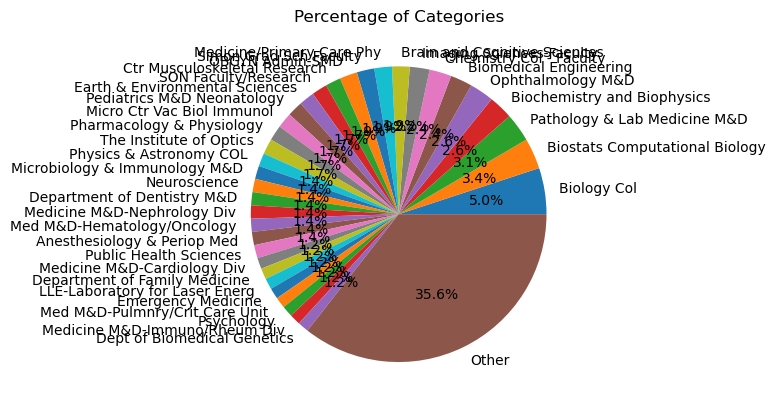

In [ ]:
vis_cat(df_faculty, 'HRMS_Department', 0.01)
vis_cat(df_faculty_count, 'HRMS_Department', 0.01)

### Visualization of the categories by Division_Name and HRMS_Department in specific schools
#### School of Medicine & Dentistry

Anesthesiology & Periop Med      95
Imaging Sciences-Faculty         91
Medicine/Primary Care Phy        85
Department of Family Medicine    71
Emergency Medicine               69
                                 ..
Neurology Memory Care             1
Pediatrics M&D Genetics           1
Med School Finance M&D            1
Psychiatry M&D Long Term Care     1
Psychiatry M&D Education          1
Name: HRMS_Department, Length: 121, dtype: int64


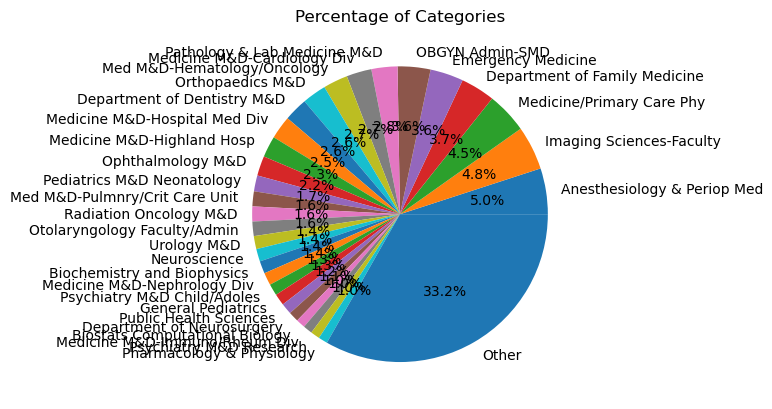

Biostats Computational Biology    14
Pathology & Lab Medicine M&D      13
Ophthalmology M&D                 11
Biochemistry and Biophysics       11
Imaging Sciences-Faculty           9
                                  ..
Neuro-Ctr Health & Tech/Admin      1
Cardiac Surgery M&D                1
Neurology/CTN Glial Disease        1
Bariatric & GI Surgery             1
Medicine M&D-Palliative Care       1
Name: HRMS_Department, Length: 85, dtype: int64


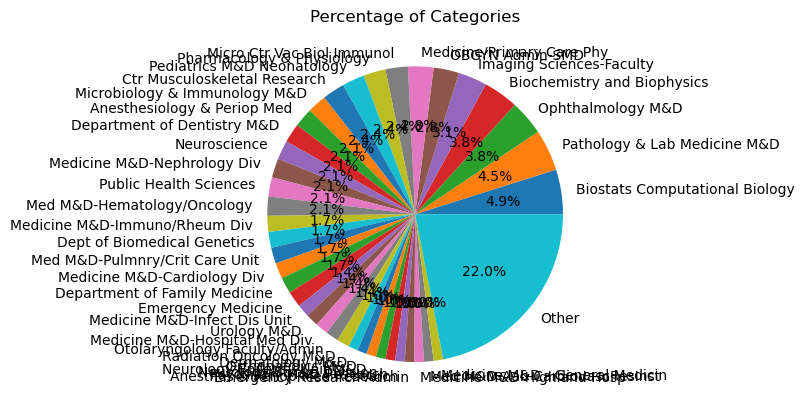

In [ ]:
vis_cat(df_faculty.loc[df_faculty['Division_Name']=='School of Medicine & Dentistry'],'HRMS_Department')
vis_cat(df_faculty_count.loc[df_faculty_count['Division_Name']=='School of Medicine & Dentistry'],'HRMS_Department')

#### The College

Biology Col                       33
Mathematics Col                   30
Modern Languages and Cultures     29
Physics & Astronomy COL           27
English Col                       24
Political Science Col             23
Economics Col                     19
Chemistry Col - Faculty           18
Writing, Speaking,and Argument    17
Psychology                        16
Brain and Cognitive Sciences      16
Religion & Classics               14
History Col                       14
Earth & Environmental Sciences    13
Philosophy Col                    11
Art & Art History Col             11
Dean's Office Col-Admin            9
Anthropology Col                   9
Arthur Satz Dept of Music          8
Linguistics                        7
Data Science Consortium            5
Center for Visual Science Col      4
Psychology-Children's Inst         4
Physics COL Overseas               4
Psychology-MHFC                    3
Chemistry Col                      3
Dean's Staff                       3
I

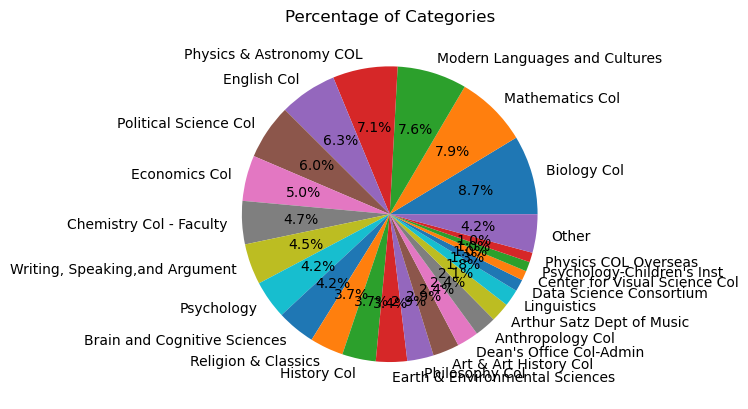

Biology Col                       21
Chemistry Col - Faculty           10
Brain and Cognitive Sciences       8
Earth & Environmental Sciences     7
Physics & Astronomy COL            6
Psychology                         5
Economics Col                      3
Political Science Col              3
Mathematics Col                    3
Chemistry Col                      2
Center for Visual Science Col      2
Modern Languages and Cultures      2
Psychology-MHFC                    1
Dean's Office Col-Admin            1
English Col                        1
Writing, Speaking,and Argument     1
Art & Art History Col              1
Name: HRMS_Department, dtype: int64


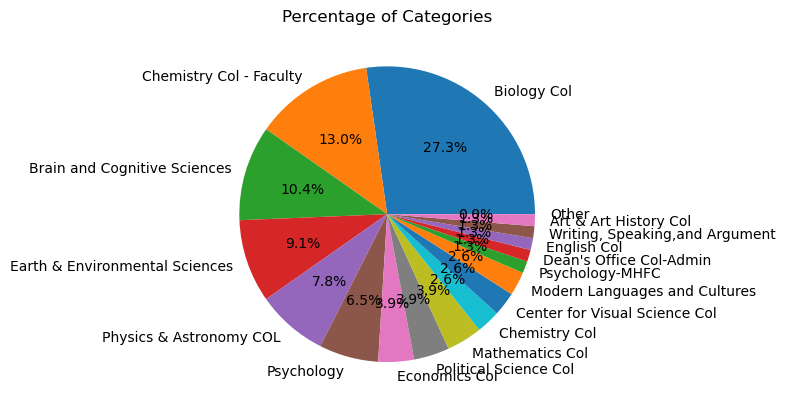

In [ ]:
vis_cat(df_faculty.loc[df_faculty['Division_Name']=='The College'],'HRMS_Department')
vis_cat(df_faculty_count.loc[df_faculty_count['Division_Name']=='The College'],'HRMS_Department')

#### School of Engineering & Applied Sciences

The Institute of Optics        26
Electrical & Computer Engg     23
Computer Science               20
Biomedical Engineering         17
Mechanical Engineering Engg    16
Chemical Engineering Engg      12
Name: HRMS_Department, dtype: int64


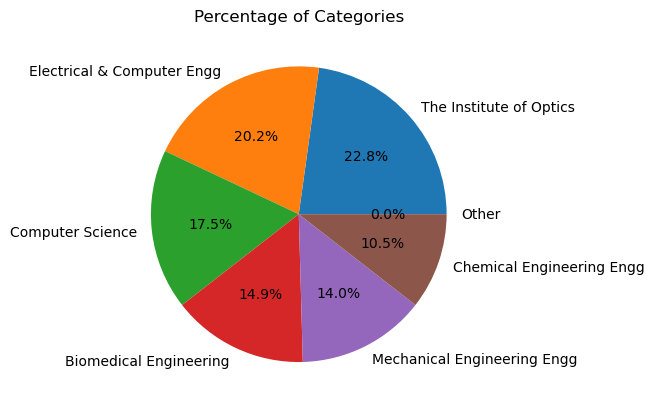

Biomedical Engineering         10
The Institute of Optics         7
Electrical & Computer Engg      4
Computer Science                3
Mechanical Engineering Engg     2
Chemical Engineering Engg       1
Name: HRMS_Department, dtype: int64


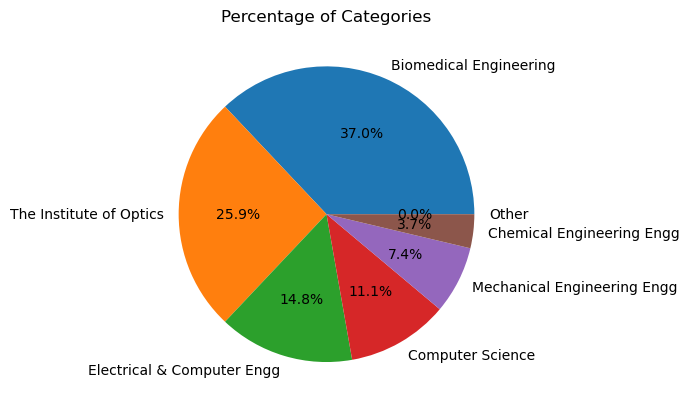

In [ ]:
vis_cat(df_faculty.loc[df_faculty['Division_Name']=='Sch Engineering & App Sci'],'HRMS_Department')
vis_cat(df_faculty_count.loc[df_faculty_count['Division_Name']=='Sch Engineering & App Sci'],'HRMS_Department')

### Visualization of author name occurrences by Division_Name and HRMS_Department
The occurrence is either the total number of datasets deposited by the faculty
or the mean number of datasets deposited by the faculty in the specific school/department.
(only considering the faculties with datasets)

In [ ]:
def vis_cat_count(df, cat, method='sum', threshold=0.01):
    if method=='sum':
        cat_counts = df['Count'].groupby(df[cat]).sum()
    elif method=='mean':
        cat_counts = df['Count'].groupby(df[cat]).mean()
    else:
        print('method must be sum or mean')
        return
    cat_counts = cat_counts.sort_values(ascending=False)
    print(cat_counts)
    # Calculate the percentage of each Repository
    percentages = cat_counts / cat_counts.sum()

    # Merge categories with a percentage lower than 1% into 'Other'
    percentages['Other'] = percentages[percentages < threshold].sum()
    percentages = percentages[(percentages >= threshold) | (percentages.index=='Other')]

    # Create the pie chart
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')

    # Set the title
    plt.title('Percentage of Categories')

    # Display the chart
    plt.show()

#### The distribution of division (school) in general.

Division_Name
The College                       2872.0
School of Medicine & Dentistry    1614.0
School of Nursing                  262.0
Simon Grad School Business         168.0
Sch Engineering & App Sci          136.0
Eastman School Music                30.0
Laser Lab & COI                     22.0
Name: Count, dtype: float64


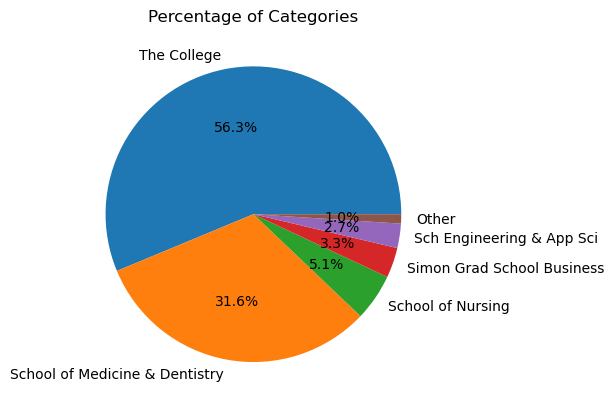

Division_Name
The College                       37.298701
School of Nursing                 32.750000
Simon Grad School Business        21.000000
Eastman School Music               7.500000
School of Medicine & Dentistry     5.623693
Sch Engineering & App Sci          5.037037
Laser Lab & COI                    4.400000
Name: Count, dtype: float64


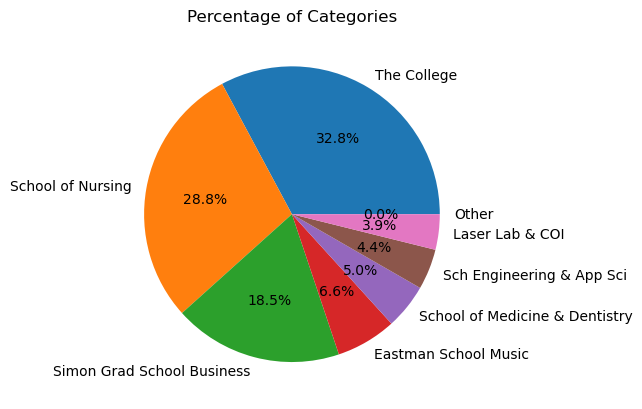

In [ ]:
vis_cat_count(df_faculty_count, 'Division_Name')
vis_cat_count(df_faculty_count, 'Division_Name', 'mean')

#### The distribution of department in general.

HRMS_Department
Chemistry Col                    1205.0
Chemistry Col - Faculty          1199.0
SON Faculty/Research              260.0
Biology Col                       257.0
Simon Grad Sch Faculty            168.0
                                  ...  
Colorectal Surgery                  1.0
Pediatrics Med Ctr                  1.0
Peds Gastro/Hepatology/Nutrit       1.0
Neurology Memory Care               1.0
Plastic Surgery                     1.0
Name: Count, Length: 116, dtype: float64


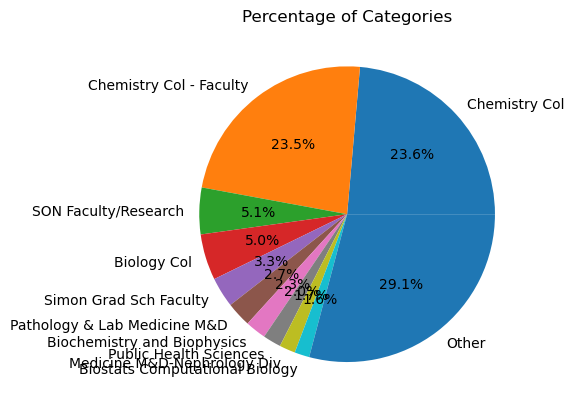

HRMS_Department
Chemistry Col                     602.500000
Chemistry Col - Faculty           119.900000
SON Faculty/Research               37.142857
Simon Grad Sch Faculty             21.000000
Medicine M&D-Gastroentrol Div      21.000000
                                     ...    
Pediatrics M&D Cardiology           1.000000
Pediatrics M&D Inf Diseases         1.000000
Peds M&D Hematology/Oncology        1.000000
Peds Gastro/Hepatology/Nutrit       1.000000
Medicine M&D - General Medicin      1.000000
Name: Count, Length: 116, dtype: float64


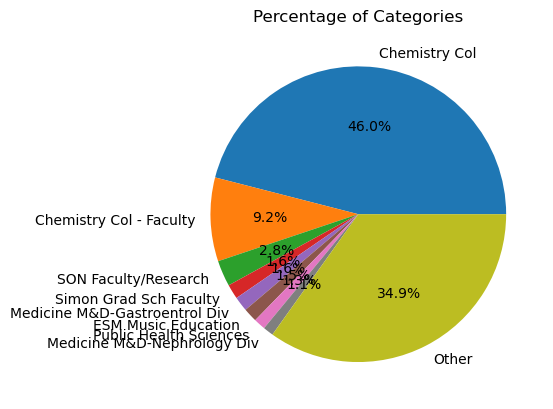

In [ ]:
vis_cat_count(df_faculty_count, 'HRMS_Department')
vis_cat_count(df_faculty_count, 'HRMS_Department', 'mean')

#### The distribution of department in specific schools.
#### School of Medicine & Dentistry

HRMS_Department
Pathology & Lab Medicine M&D      139.0
Biochemistry and Biophysics       116.0
Public Health Sciences            101.0
Medicine M&D-Nephrology Div        89.0
Biostats Computational Biology     83.0
                                  ...  
Neurology Memory Care               1.0
Medicine - Administration           1.0
Neuro-Critical Care                 1.0
Bariatric & GI Surgery              1.0
Pediatrics M&D Inf Diseases         1.0
Name: Count, Length: 85, dtype: float64


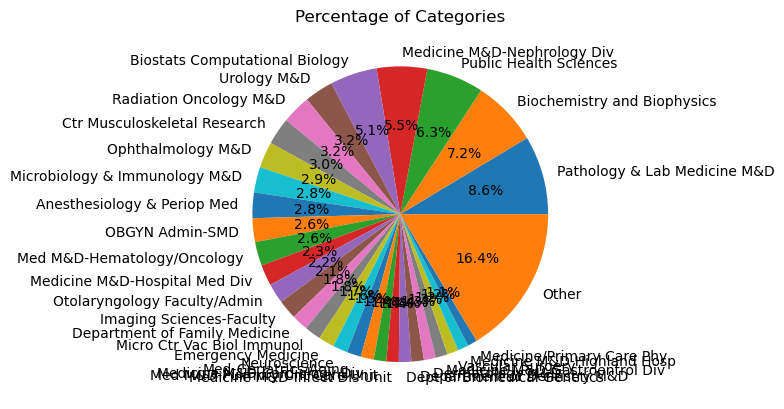

HRMS_Department
Medicine M&D-Gastroentrol Div     21.000000
Public Health Sciences            16.833333
Medicine M&D-Nephrology Div       14.833333
Psychiatry M&D Psy Consult Svc    13.000000
Urology M&D                       12.750000
                                    ...    
Pediatrics M&D Inf Diseases        1.000000
Pediatric Rheumatology             1.000000
Neurology/CTN Glial Disease        1.000000
General Pediatrics                 1.000000
Pediatrics M&D Cardiology          1.000000
Name: Count, Length: 85, dtype: float64


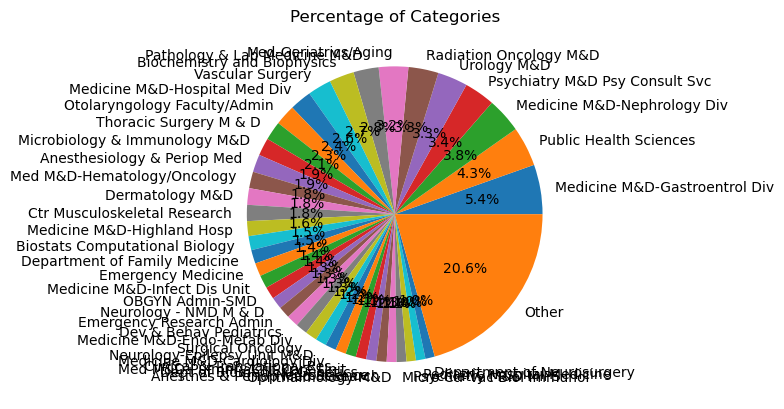

In [ ]:
vis_cat_count(df_faculty_count.loc[df_faculty_count['Division_Name']=='School of Medicine & Dentistry'], 'HRMS_Department')
vis_cat_count(df_faculty_count.loc[df_faculty_count['Division_Name']=='School of Medicine & Dentistry'], 'HRMS_Department', 'mean')

#### The College

HRMS_Department
Chemistry Col                     1205.0
Chemistry Col - Faculty           1199.0
Biology Col                        257.0
Brain and Cognitive Sciences        43.0
Psychology                          43.0
Mathematics Col                     37.0
Physics & Astronomy COL             32.0
Economics Col                       14.0
Earth & Environmental Sciences      14.0
Writing, Speaking,and Argument       6.0
Political Science Col                5.0
Dean's Office Col-Admin              4.0
Psychology-MHFC                      4.0
English Col                          3.0
Modern Languages and Cultures        3.0
Center for Visual Science Col        2.0
Art & Art History Col                1.0
Name: Count, dtype: float64


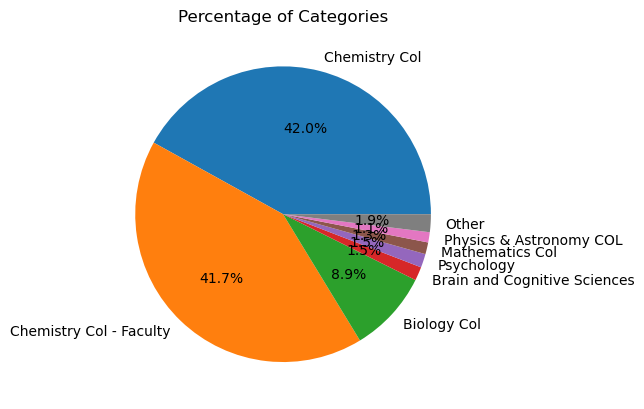

HRMS_Department
Chemistry Col                     602.500000
Chemistry Col - Faculty           119.900000
Mathematics Col                    12.333333
Biology Col                        12.238095
Psychology                          8.600000
Writing, Speaking,and Argument      6.000000
Brain and Cognitive Sciences        5.375000
Physics & Astronomy COL             5.333333
Economics Col                       4.666667
Dean's Office Col-Admin             4.000000
Psychology-MHFC                     4.000000
English Col                         3.000000
Earth & Environmental Sciences      2.000000
Political Science Col               1.666667
Modern Languages and Cultures       1.500000
Center for Visual Science Col       1.000000
Art & Art History Col               1.000000
Name: Count, dtype: float64


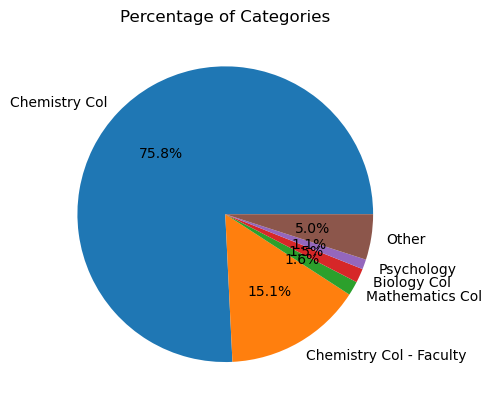

In [ ]:
vis_cat_count(df_faculty_count.loc[df_faculty_count['Division_Name']=='The College'], 'HRMS_Department')
vis_cat_count(df_faculty_count.loc[df_faculty_count['Division_Name']=='The College'], 'HRMS_Department', 'mean')